# Example for creating Heatmap and Passmap

In [1]:
%matplotlib inline 
import pandas as pd
import themepy
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from highlight_text import ax_text

from utils.misc import add_font
from utils.data_praser import extract_pass_detail
from utils.viz import (
    generate_heat_map_zone,
    generate_pass_location_map,
)

plt.ioff()

### Load TH font and set variables for convenience

In [2]:
add_font()
FONT = "Anakotmai"
FIG_SIZE = (16, 10)
DPI = 100
SAMPLE_DATA_FILE = "data/example_data.csv"
OUTPUT_FILE = "images/example_touchmap.png"

THEME = themepy.Theme()
THEME.set_theme("sample-dark").set_font(FONT)

sample-dark is the active theme

### Set Plot Layout with Gridspec

[Matpltlib's Gridspec](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html) is one of the neatest functions in Matplotlib. Do your future self a favour by take a look at Gridspec (if you've not already). You will never regret it!


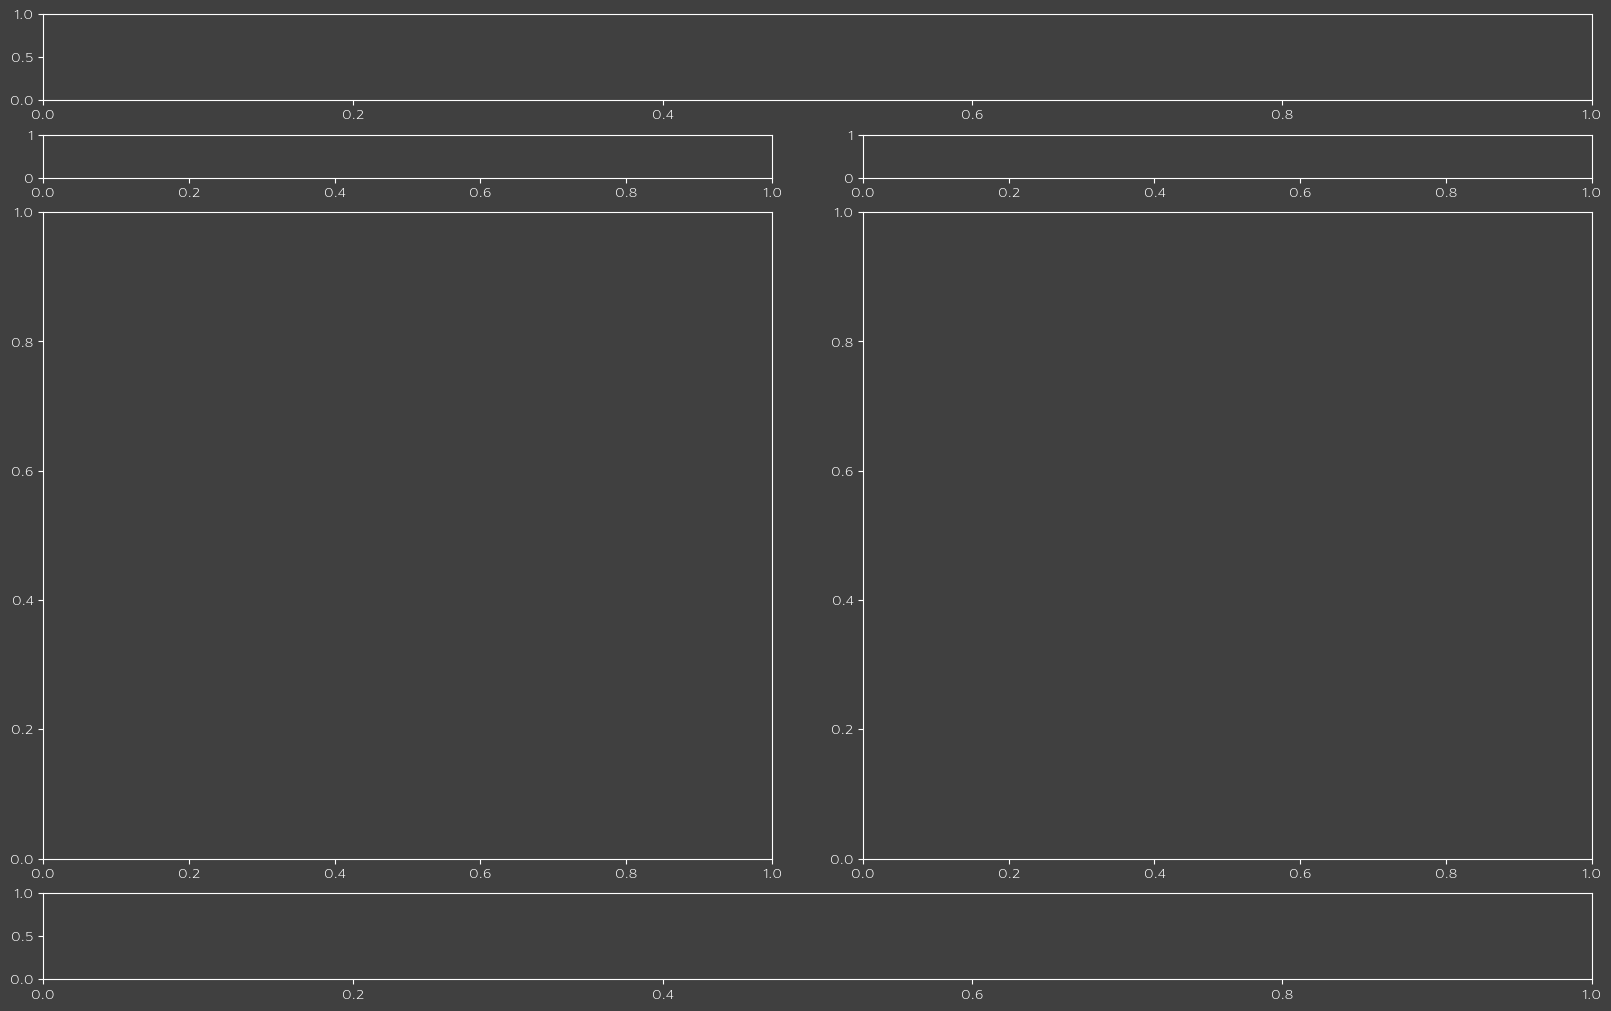

In [3]:
fig = plt.figure(figsize=FIG_SIZE, dpi=DPI, constrained_layout=True)
gs = GridSpec(
    nrows=4,
    ncols=2,
    height_ratios=[0.1, 0.05, 0.75, 0.1],
    width_ratios=[0.5, 0.5],
    figure=fig,
)
ax_title = fig.add_subplot(gs[0, :])
ax_subtitle_1 = fig.add_subplot(gs[1, 0])
ax_plot_1 = fig.add_subplot(gs[2, 0])
ax_subtitle_2 = fig.add_subplot(gs[1, 1])
ax_plot_2 = fig.add_subplot(gs[2, 1])
ax_handle = fig.add_subplot(gs[3, :])

fig

### Adding Titles and texts

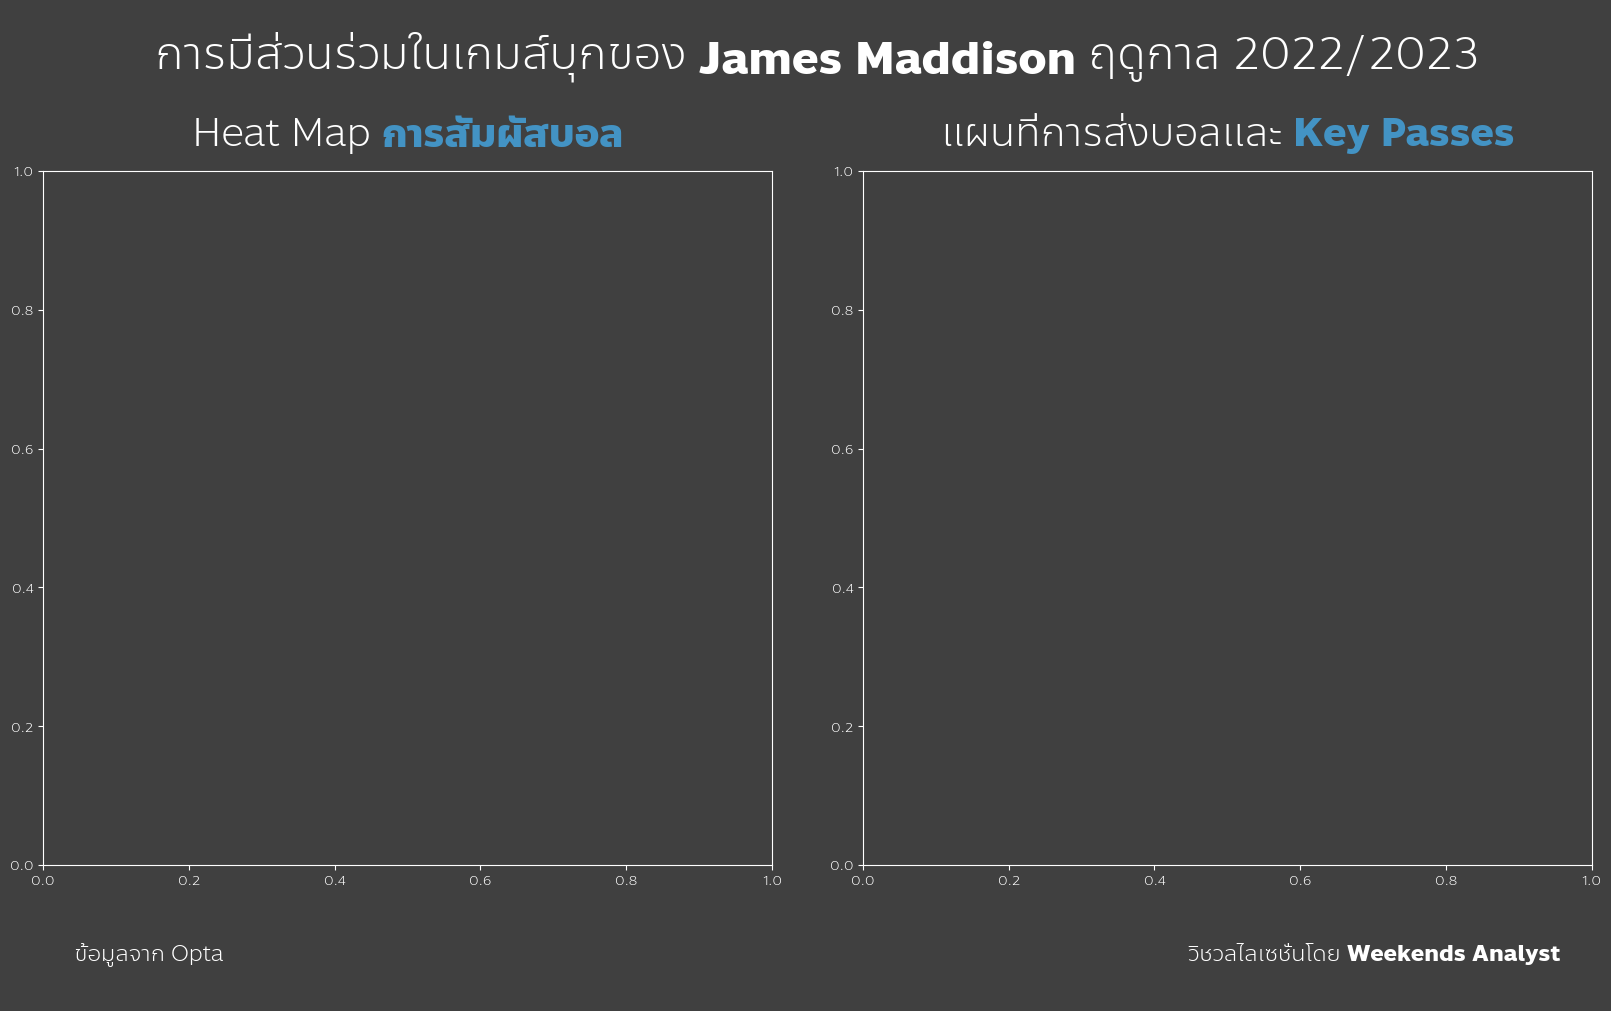

In [4]:
txt_title_1 = "การมีส่วนร่วมในเกมส์บุกของ <James Maddison> ฤดูกาล 2022/2023"
txt_title_2 = "Heat Map <การสัมผัสบอล>"
txt_title_3 = "แผนที่การส่งบอลและ <Key Passes>"
txt_credit = "ข้อมูลจาก Opta"
txt_page = "วิชวลไลเซชั่นโดย <Weekends Analyst>"
ax_text(
        s=txt_title_1,
        x=0.5,
        y=0.5,
        va="center",
        ha="center",
        fontsize=32,
        fontweight="normal",
        color="white",
        ax=ax_title,
        highlight_textprops=[{"fontweight": "bold"}],
        )

ax_text(
        s=txt_title_2,
        x=0.5,
        y=0.5,
        va="center",
        ha="center",
        fontsize=28,
        fontweight="normal",
        color="white",
        highlight_textprops=[
            {"color": "#4393c4", "fontweight": "bold"},
        ],
        ax=ax_subtitle_1,
)

ax_text(
        s=txt_title_3,
        x=0.5,
        y=0.5,
        va="center",
        ha="center",
        fontsize=28,
        fontweight="normal",
        color="white",
        highlight_textprops=[
            {"color": "#4393c4", "fontweight": "bold"},
        ],
        ax=ax_subtitle_2,
    )
ax_text(s=txt_credit, x=0.02, y=0.5, va="center", fontsize=16, ax=ax_handle)
ax_text(
        s=txt_page,
        x=0.98,
        y=0.5,
        ha="right",
        va="center",
        fontsize=16,
        ax=ax_handle,
        highlight_textprops=[
            {"fontweight": "bold", "color": "white"},
        ],
)

ax_title.axis("off")
ax_subtitle_1.axis("off")
ax_subtitle_2.axis("off")
ax_handle.axis("off")

fig

### Load data and make plots

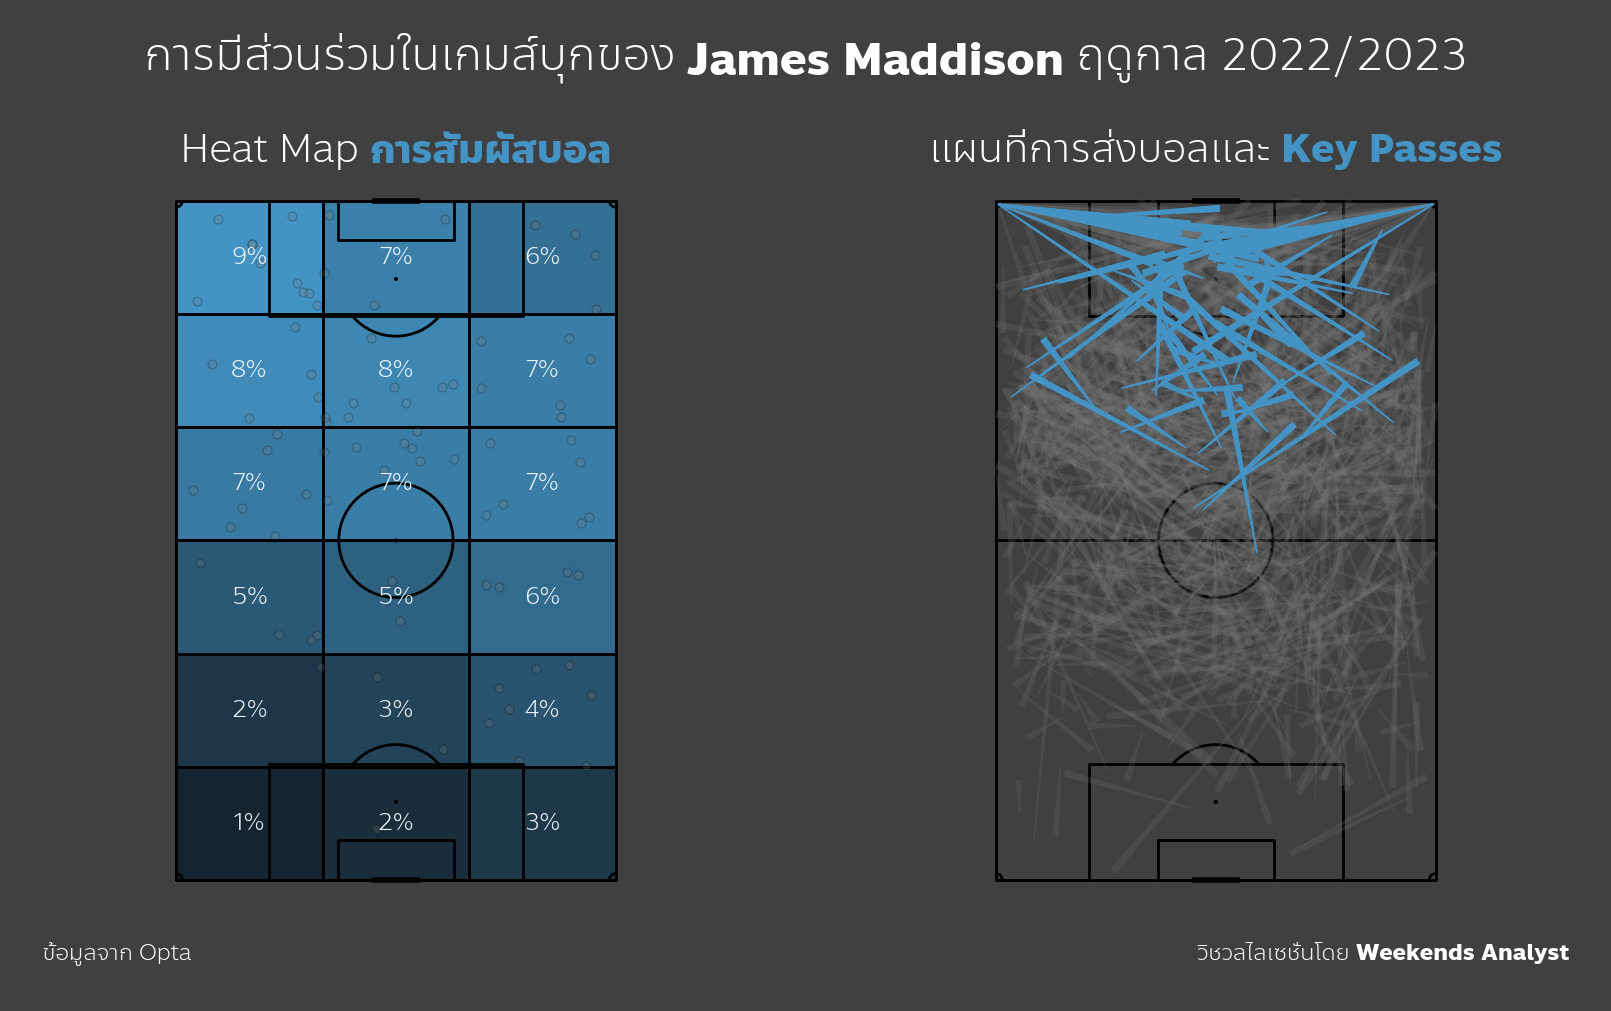

In [5]:
event_data = pd.read_csv(SAMPLE_DATA_FILE)

event_type = "BallTouch"
df = event_data[(event_data["type"] == event_type)]
generate_heat_map_zone(df=df, ax=ax_plot_1, normalize=True, annotate=True)

event_type = "Pass"
pass_detail_df = extract_pass_detail(event_df=event_data)
generate_pass_location_map(df=pass_detail_df, ax=ax_plot_2)

plt.show()